# ETL & EDA

Lenguajes a Utilizar:
- Python
- Pandas

## Importamos las libreriras necesarias para empezar con la limpieza de datos.

In [1]:
import pandas as pd
import numpy as np

## Mandamos atraer los datos.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## #EXTRACT

In [3]:
#Renta: Ingrese los datos de Renta
renta_inmuebles = pd.read_csv("/content/drive/MyDrive/Proyecto de DataEngenieer/Proyecto_Inmobiliario/Proyecto/Limpieza_Data/Renta_inmuebles24.csv")
renta_propiedades = pd.read_csv("/content/drive/MyDrive/Proyecto de DataEngenieer/Proyecto_Inmobiliario/Proyecto/Limpieza_Data/Renta_Propiedades.csv")
#Venta: Ingresa los datos de Venta
venta_inmuebles = pd.read_csv("/content/drive/MyDrive/Proyecto de DataEngenieer/Proyecto_Inmobiliario/Proyecto/Limpieza_Data/Venta_inmuebles24.csv")
venta_propiedades = pd.read_csv("/content/drive/MyDrive/Proyecto de DataEngenieer/Proyecto_Inmobiliario/Proyecto/Limpieza_Data/Venta_Propiedades.csv")

Eliminacion de las columnas Innecesaria:

In [4]:
#Eliminacion de las columnas en Renta:
renta_inmuebles = renta_inmuebles.drop(columns=['Imagen','Imagen1','Imagen2','Imagen3','Imagen4','Imagen5','Imagen6','Info','Info7','Imagen8','gotoposting_URL','publisherlogo_URL', 'Imagen9','Título1','Imagen7','Image1','Image2','Image3','Image4','Image5','Image6','Info1','Inf1','Image7','Precio1','Localización1','Palabras_clave1','gotoposting_URL1','gotoposting1','Descripción1','gotoposting'], axis=1)
renta_propiedades =renta_propiedades.drop(columns=['Imagen','totalphotos','Título1','Imagen1','totalphotos1','detail1','headerdetail2','headerdetai1','Precio1','Vista1','Vista'],axis=1)

#Eliminacion de las columnas en Venta:
venta_inmuebles = venta_inmuebles.drop(columns=['Imagen','Imagen1','Imagen2','Imagen3','Imagen4','Imagen5','Info','Info6','Imagen7','postingpills','gotoposting_URL','publisherlogo_URL','Imagen8'],axis=1)
venta_propiedades =venta_propiedades.drop(columns=['Imagen','totalphotos','Vista'],axis=1)

## Renombramos las columnas para continuar con la limpieza de datos

In [5]:
#Renombracion de las columnas de Renta:
renta_propiedades = renta_propiedades.rename(columns={'Título':'Descripcion1','detail':'Colonia','headerdetail':'Banos','headerdetail1':'M2'})
renta_inmuebles = renta_inmuebles.rename(columns={'Título':'Direccion','Precio':'Precio','Localización':'Colonia','Palabras_clave':'M2', 'Descipcion':'Descripcion2'})

#Renombrcion de las columnas de Venta:
venta_propiedades = venta_propiedades.rename(columns={'Título':'Descripcion3','detail':'Colonia','headerdetail':'Banos','headerdetail1':'M2'})
venta_inmuebles = venta_inmuebles.rename(columns={'Título':'Direccion','Precio':'Precio','Localización':'Colonia','Palabras_clave':'M2', 'Descipcion':'Descripcion4'})

In [6]:
venta_propiedades.head()

,Descripcion3,Colonia,Banos,M2,Precio
0,"Magnifica Casa con uso comercial, oficina corp...",\nCOSTA AZUL\t,\n\n,200,\n$ 3.8 MDP\t
1,"TENEMOS EN VENTA LOCAL PARA OFICINA, DESPACHO,...",\nAcapulco de Juarez Centro\t,\n\n1\t,32,\n$ 380 mil MN\t
2,"TENEMOS EN VENTA LOCAL PARA OFICINA, DESPACHO,...",\nsn\t,\n\n1\t,32,\n$ 380 mil MN\t
3,OFICINAS EN PREVENTA EN COSTA AZUL.IDEALES PAR...,\nCosta Azul #543\t,\n\n2\t,115,\n$ 2.45 MDP\t
4,OFICINAS EN PREVENTA EN COSTA AZUL.IDEALES PAR...,\nCosta Azul\t,\n\n3\t,115,\n$ 2.45 MDP\t


## Transfort: Vamos transformando los datos:

## Venta:

In [7]:
#Columna Direccion de Inmuebles24:
Direccion1 = venta_inmuebles['Direccion'].str.split('\n\t\n\t\t', n=2, expand=True)
Direccion1 = Direccion1[1].str.split('\n\t\n',n=2,expand=True).head()
Direccion1 = Direccion1.drop(columns=[1], axis=1)

#Columna Precio de Inmuebles24:
Precio1 = venta_inmuebles['Precio'].str.split(expand=True)

#Columna Descripcion de Inmuebles24:
descrip1 = venta_inmuebles['Descripción'].str.split('\n\t\t\t\t\t\t\t',n=2,expand=True)
descrip1 = descrip1.drop(columns=[0,2], axis=1)

#Columna M2 de Inmuebles24:
m21 = venta_inmuebles['M2'].str.split(expand=True)
m21 = m21.drop(columns=[4,5])

#---------------------------------------------------------------------------------------------#

#Columna Banos de Propiedades
ba1 = venta_propiedades['Banos'].str.split('\n\n', n=2, expand=True)
ba1 = ba1[1].str.split('\t', n=2, expand=True)
ba1 = ba1.drop(columns=[1],axis=1)

#Columna Precio de Propiedades
Pre1 = venta_propiedades['Precio'].str.split('\n',n=2,expand=True)
Pre1 = Pre1[1].str.split('\t',n=2, expand=True)
Pre1 = Pre1.drop(columns=[1],axis=1)
Pre1 = Pre1[0].str.split(expand=True)

#Columna Colonia de Propiedades
Colonia1 = venta_propiedades['Colonia'].str.split('\n', n=2, expand=True)
Colonia1 = Colonia1[1].str.split('\t', n=2, expand=True)
Colonia1 = Colonia1.drop(columns=[1], axis=1)


## Renta:

In [8]:
#Columna Direccion de inmuebles24:#Nota: es Direccion
Direccion2 = renta_inmuebles['Direccion'].str.split('\n\t\n\t\t', n=2, expand=True)
Direccion2 = Direccion2.drop(columns=[0], axis=1)

#Columna Precio de inmuebles24
Precio2 = renta_inmuebles['Precio'].str.split(expand=True)

#Columna Descripcion de inmuebles24
Descripcion2 = renta_inmuebles['Descripción'].str.split('\n\t\t\t\t\t\t\t', n=2, expand=True)
Descripcion2 = Descripcion2.drop(columns=[0,2], axis=1)

#Columna M2 de Inmuebles24:
M22 = renta_inmuebles['M2'].str.split(expand=True)
M22 = M22.drop(columns=[4,5,6,7])

#----------------------------------------------------------------------------------------------------------------#

#Columna 'Colonia' de Propiedades.com
Colonia2 = renta_propiedades['Colonia'].str.split('\t',n=2, expand=True)
Colonia2 = Colonia2[0].str.split('\n', n=2,expand=True)
Colonia2 = Colonia2.drop(columns=[0], axis=1)

#Columna Banos de Propiedades.com
Bano2 = renta_propiedades['Banos'].str.split(expand=True)

#Columna Precio de Propiedades.com
precio2 = renta_propiedades['Precio'].str.split(expand=True)

## Creamos las Tablas para posteriormente Unirlas:

In [9]:
#Creamos las variables para poder crear las tablas o mejor dicho los "DataFrames"
#Creamos los DataFrame de Renta1 y Venta1
df_venta1 = pd.DataFrame()
df_renta1 = pd.DataFrame()

#Creamos los DataFrame de Renta2 y Venta2
df_renta = pd.DataFrame()
df_venta = pd.DataFrame()

## Concatenamos las tablas para pdoerlas observar:



In [10]:
#Columnas Venta_Inmuebles24:

df_venta1['Descripcion'] = descrip1
df_venta1['Direccion'] = Direccion1
df_venta1['Colonia'] = venta_inmuebles['Colonia']
df_venta1 = df_venta1.assign(Zona='None')
df_venta1['USD/MX'] = Precio1[0]
df_venta1['Precio'] = Precio1[1]
df_venta1['N_m2'] = m21[0]
df_venta1['M2'] = m21[1]
df_venta1['Numero_BE'] = m21[2]
df_venta1['Banos/Estacionamiento'] = m21[3]

In [11]:
df_venta1.head(1)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,N_m2,M2,Numero_BE,Banos/Estacionamiento
0,"Cad Plaza 1730. Dos niveles, inmejorable ubica...","Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de Juárez",None,MN,"24,000,000",1500,m²,None,None


In [12]:
#DataFrame de Venta_Propiedades.com:
df_venta['Descripcion'] = venta_propiedades['Descripcion3']
df_venta = df_venta1.assign(Direccion='Desconocida')
df_venta['Colonia'] = Colonia1
df_venta = df_venta.assign(Zona='None')
df_venta['USD/MX'] = Pre1[2]
df_venta['Precio'] = Pre1[1]
df_venta['N_m2'] = venta_propiedades['M2']
df_venta = df_venta1.assign(M2='m2')
df_venta['Banos/Estacionamiento'] = ba1

In [13]:
df_venta.head(1)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,N_m2,M2,Numero_BE,Banos/Estacionamiento
0,"Cad Plaza 1730. Dos niveles, inmejorable ubica...","Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de Juárez",None,MN,"24,000,000",1500,m2,None,


In [14]:
 #DataFrame de Renta_Inmuebles24:
df_renta1['Descripcion'] = Descripcion2
df_renta1['Direccion'] = Direccion2[1]
df_renta1['Colonia'] = renta_inmuebles['Colonia']
df_renta1 = df_renta1.assign(Zona='None')
df_renta1['USD/MX'] = Precio2[0]
df_renta1['Precio'] = Precio2[1]
df_renta1['Numero_m2'] = M22[0]
df_renta1['M2'] = M22[1]
df_renta1['Numero'] = M22[2]
df_renta1['Banos/Estacionamiento'] = M22[3]

In [15]:
df_renta1.head(1)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,Numero_m2,M2,Numero,Banos/Estacionamiento
0,"Cad Pabellón Costera Oficina 26, 51 m², dos ni...","Costera Miguel Alemán 3124, Lomas de Costazul,...","Lomas de Costa Azul, Acapulco de Juárez",None,MN,"13,500",51,m²,None,None


In [16]:
#DataFrame de Renta_Propiedades.com:
df_renta['Descripcion'] = renta_propiedades['Descripcion1']
df_renta = df_renta.assign(Direccion='Desconocida')
df_renta['Colonia'] = Colonia2
df_renta = df_renta.assign(Zona='None')
df_renta['USD/MX'] = precio2[3]
df_renta['Precio'] = precio2[1]
df_renta['Numero_m2'] = renta_propiedades['M2']
df_renta = df_renta.assign(M2='m2')
df_renta['Numero'] = Bano2


In [17]:
df_renta.head(1)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,Numero_m2,M2,Numero
0,Oficina/consultorio en renta en Costa Azul 63 ...,Desconocida,Anton de Alaminos #1,None,MN,10,63,m2,2


## Unimos los datos y renombramos los DataFrame a "Venta" y "Renta".

In [18]:
renta = pd.concat([df_renta1, df_renta], ignore_index=True)
venta = pd.concat([df_venta1, df_venta], ignore_index=True)
#Borramos las columnas innecesarias:

In [19]:
renta.head()

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,Numero_m2,M2,Numero,Banos/Estacionamiento
0,"Cad Pabellón Costera Oficina 26, 51 m², dos ni...","Costera Miguel Alemán 3124, Lomas de Costazul,...","Lomas de Costa Azul, Acapulco de Juárez",None,MN,"13,500",51,m²,None,None
1,Cad Torre Latina - Oficina piso 6. Vistas al c...,CAD Torre Latina. Oficina Piso 6. Vista a la B...,"Fraccionamiento Club Deportivo, Acapulco de J...",None,MN,"54,466",236,m²,5,estac.
2,Cad Torre Latina - Oficina piso 9. Vistas al c...,CAD Torre Latina. Oficina Piso 9. 5 Estacionam...,"Fraccionamiento Club Deportivo, Acapulco de J...",None,MN,"54,437",237,m²,5,estac.
3,Cad Torre Latina - Oficina piso 7. Vistas al c...,Av. Costera Miguel Alemán 2611\n\t\n,"Fraccionamiento Club Deportivo, Acapulco de J...",None,MN,"54,437",237,m²,5,estac.
4,Piso 4 y 5 en renta. Edificio frente a walmart...,Icacos \n\t\n,"Icacos, Acapulco de Juárez",None,MN,"82,816",488,m²,2,estac.


In [20]:
#Creacion de nuevas tablas: "Renta y Venta"
#renta.to_csv("renta.csv", index=False)

#index = False(Indicar si no queremos el indice 0)
#venta.to_csv('venta.csv', index=False)

# Mandamos a llamar el archivo creado para acompletar las columnas "Colonia" y "Zona".

In [21]:
#LLamaremos a nuestros dataframes "Colonia" Y "Zaona"

df = "/content/drive/MyDrive/Proyecto de DataEngenieer/Proyecto_Inmobiliario/Proyecto/Limpieza_Data/Colonia_Zona.xlsx"
df = pd.read_excel(df)
df.head()

,Direccion,Colonia,Zona,Unnamed: 3,Direccion.1,Colonia.1,Zona.1
0,"Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de JuÃ¡rez",Diamante,NaN,"Costera Miguel AlemÃ¡n 3124, Lomas de Costazul...","Lomas de Costa Azul, Acapulco de JuÃ¡rez",Dorada
1,CAD Torre Latina. Oficina Piso 9. Vista al Mar...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,NaN,CAD Torre Latina. Oficina Piso 6. Vista a la B...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
2,Av. Costera Miguel AlemÃ¡n 2611,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,NaN,CAD Torre Latina. Oficina Piso 9. 5 Estacionam...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
3,CAD Torre Latina. Oficina Piso 6. Vistas al Ca...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,NaN,Av. Costera Miguel AlemÃ¡n 2611,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
4,Comandante Baresford,"Fraccionamiento Costa Azul, Acapulco de JuÃ¡rez",Dorada,NaN,Icacos,"Icacos, Acapulco de JuÃ¡rez",Dorada


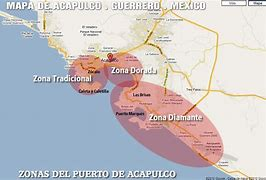

#### Volvemos Hacer limpieza de los datos de las columnas Ubicacion, Zona y renta

In [22]:
#Eliminamos columnas innecesarias
df = df.drop(columns = ['Unnamed: 3'])
df.head(5)

,Direccion,Colonia,Zona,Direccion.1,Colonia.1,Zona.1
0,"Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de JuÃ¡rez",Diamante,"Costera Miguel AlemÃ¡n 3124, Lomas de Costazul...","Lomas de Costa Azul, Acapulco de JuÃ¡rez",Dorada
1,CAD Torre Latina. Oficina Piso 9. Vista al Mar...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,CAD Torre Latina. Oficina Piso 6. Vista a la B...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
2,Av. Costera Miguel AlemÃ¡n 2611,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,CAD Torre Latina. Oficina Piso 9. 5 Estacionam...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
3,CAD Torre Latina. Oficina Piso 6. Vistas al Ca...,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada,Av. Costera Miguel AlemÃ¡n 2611,"Fraccionamiento Club Deportivo, Acapulco de Ju...",Dorada
4,Comandante Baresford,"Fraccionamiento Costa Azul, Acapulco de JuÃ¡rez",Dorada,Icacos,"Icacos, Acapulco de JuÃ¡rez",Dorada


### Unimos las columnas al dataframe original

In [23]:
#Comprobamos cuales de las columnas se van a cambiar.
venta.head(2)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,N_m2,M2,Numero_BE,Banos/Estacionamiento
0,"Cad Plaza 1730. Dos niveles, inmejorable ubica...","Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de Juárez",None,MN,"24,000,000",1500,m²,None,None
1,Cad Torre Latina - Oficina piso 9. Vistas al c...,CAD Torre Latina. Oficina Piso 9. Vista al Mar...,"Fraccionamiento Club Deportivo, Acapulco de J...",None,USD,"355,215",237,m²,5,estac.


In [29]:
#Renombramos las columnas.
renta['Zona'] = df['Zona.1']
venta['Zona'] = df['Zona']

#### Comprobamos los datos que esten bien.

In [30]:
renta.head(2)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,Numero_m2,M2,Numero,Banos/Estacionamiento
0,"Cad Pabellón Costera Oficina 26, 51 m², dos ni...","Costera Miguel Alemán 3124, Lomas de Costazul,...","Lomas de Costa Azul, Acapulco de Juárez",Dorada,MN,"13,500",51,m²,None,None
1,Cad Torre Latina - Oficina piso 6. Vistas al c...,CAD Torre Latina. Oficina Piso 6. Vista a la B...,"Fraccionamiento Club Deportivo, Acapulco de J...",Dorada,MN,"54,466",236,m²,5,estac.


In [31]:
venta.head(1)

,Descripcion,Direccion,Colonia,Zona,USD/MX,Precio,N_m2,M2,Numero_BE,Banos/Estacionamiento
0,"Cad Plaza 1730. Dos niveles, inmejorable ubica...","Blvrd. de las Naciones 1730, la Poza","Barrio La Poza, Acapulco de Juárez",Diamante,MN,"24,000,000",1500,m²,None,None


In [32]:
#Columnas agregar =  Propi_renta2, Propi_renta1
renta.to_csv("renta.csv", index=False)

#index = False(Indicar si no queremos el indice 0)
venta.to_csv('venta.csv', index=False)